# Census Income Data Set

The Extraction of this dataset was don from 1994 Census database by Barry Becker.
A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).

The Prediction task is Income of the people which is to determine whether a person makes over 50K a year or not. The attributes are denoted as >50K or <=50K.

We have other fields as follows:

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Dataset

Loading / Cleaning / Formatting

In [2]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


As per the data provided there are some missing values which are being indicated by "?"

In [3]:
#Shape of the above dataset:
df.shape

(32561, 15)

In [4]:
#head shows first five rows of the data:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#tail shows last five rows of the data:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#types of the data:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

The above data set is consisting of two data types that is : Int and Object

Checking any Missing Values

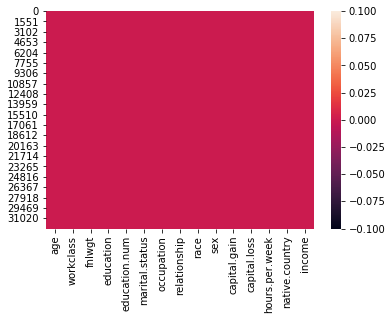

In [8]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Finding the Uniqueness in some of the data for double check:

In [10]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [12]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.describe

<bound method NDFrame.describe of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-marri

In [14]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There are no missing values in the above data , we will be needing all the above values on the same scale and thus we will use standard scaler for the same.

we are reviewing the average age here that is 38 hours per week a person is working is 40 hours then we have the min and maximum values of each variables too.

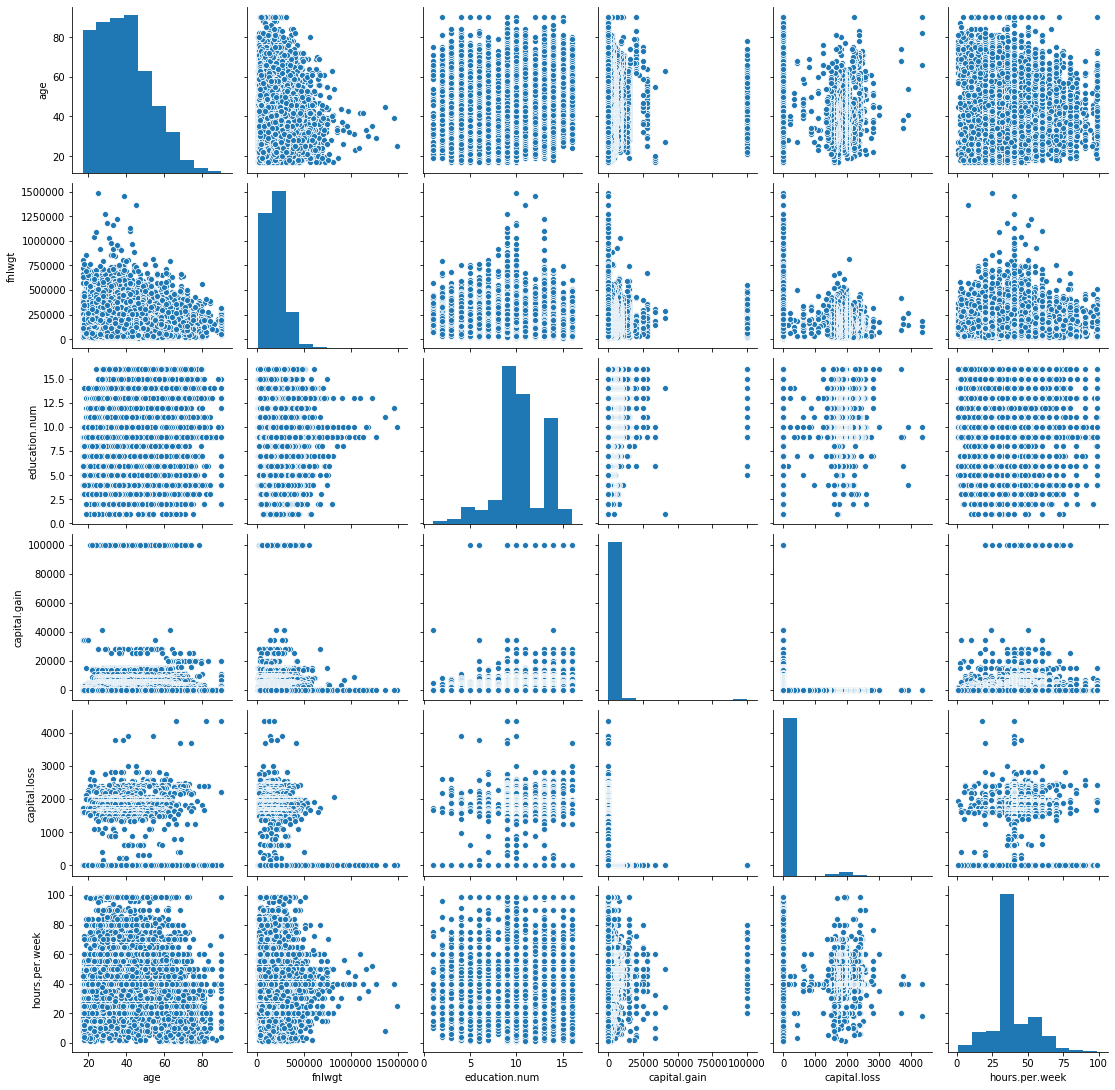

In [15]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.


These fields are :
'age','education.num', 
'capital.gain','capital.loss',
'hours.per.week'


These fields are some what showing neutral correlation with each other.

The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation.

There is only 1 field which is negative relationship with all the other  fields : 'fnlwgt' . We will remove this field before modeling our data.

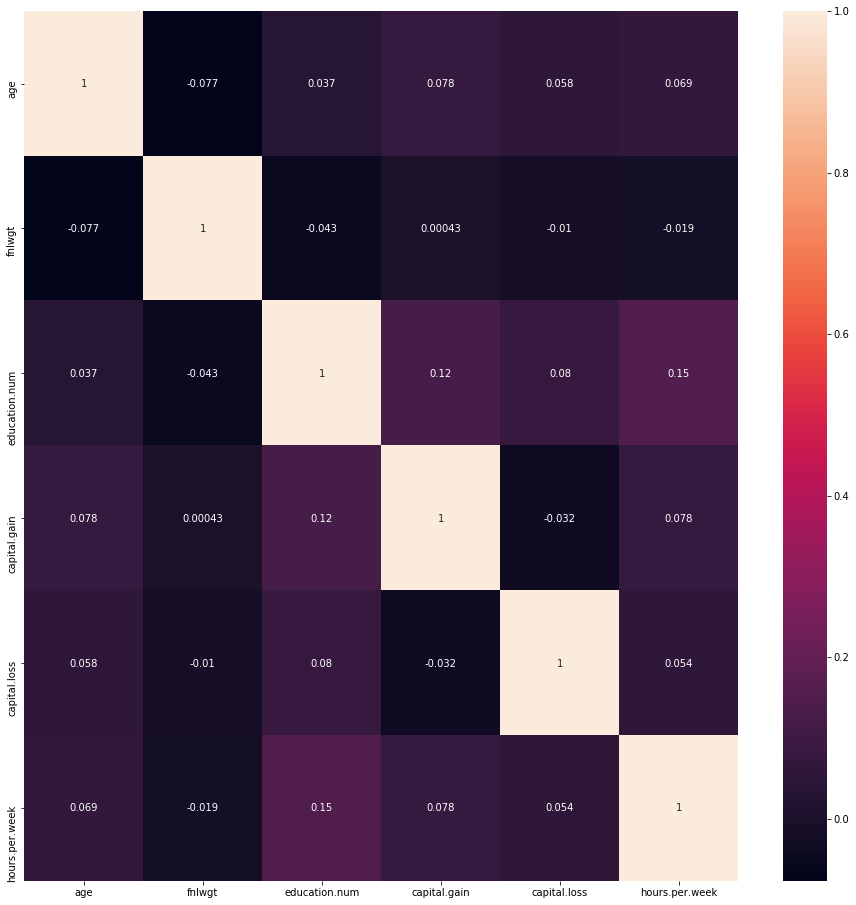

In [16]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [17]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital.status', 'occupation',
        'relationship', 'race', 'sex', 'native.country', 'income'],
       dtype='object')}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7a87c4550>,
      dtype=object)

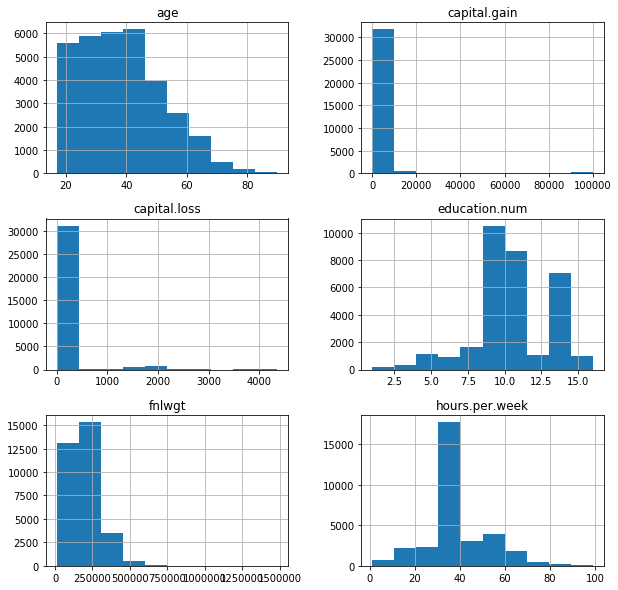

In [18]:
df.hist(figsize=(10,10))

The above histogram graph shows that the maximum number of age is between the range of 39 to 46 . 

We have more 15000 people working for 40 hours per week.

There are maximum number of people that is 10000 for which they have completed 10 years of education.

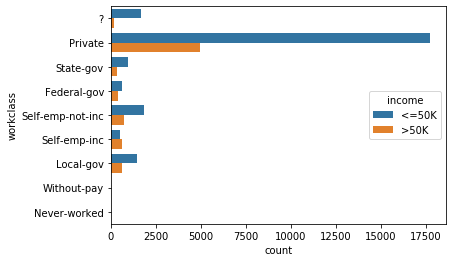

In [19]:
sns.countplot(y='workclass', hue='income', data=df)

There are more than 17500 people with the less tan or equal to 50k income group where as it has the most number of people which have more than 50k income group people too.

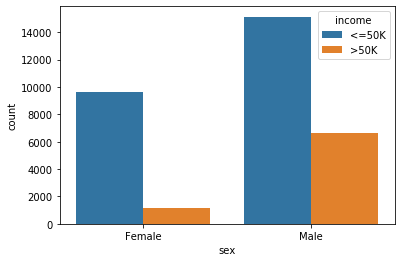

In [20]:
sns.countplot(x='sex', hue='income', data=df)

Through the above graph we could see that the count of male is more than the female as per the most of the income grup lies below or equal to 50k.

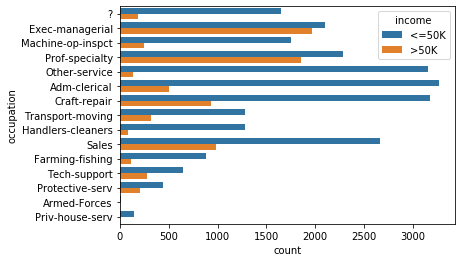

In [21]:
sns.countplot(y='occupation', hue='income', data=df)

The above graph shows the income group of the people according to their proffession or occupation where craft-repair , adm-clerical, other services and sales are leading with high number or count.

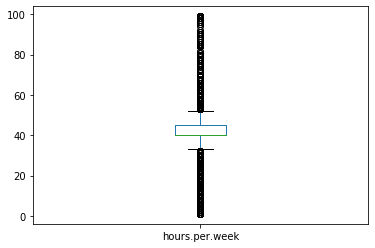

In [22]:
df['hours.per.week'].plot.box()

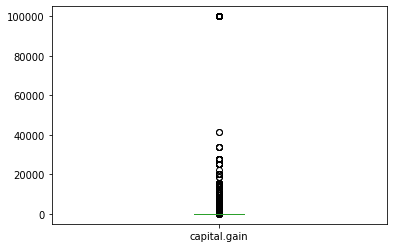

In [23]:
df['capital.gain'].plot.box()


The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as capital gain, hours per week.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

In [24]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital.status', 'occupation',
        'relationship', 'race', 'sex', 'native.country', 'income'],
       dtype='object')}

# Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


# Removing Outliers:
    
Removing the outliers from the data by using Z_SCORE

In [26]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(32561, 15)


In [27]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(27418, 15)


After removing the outliers from the data the shape of the data has change from 32561,15 to 25941,15 which shows that with the z score we are able to remove various rows , Hence our new data shae is (25941,15)


In [28]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,2,159908,9,13,2,1,5,4,0,0,1258,38,39,0
1471,72,2,144515,10,16,2,4,0,4,1,0,1258,40,39,0
1472,76,0,224680,14,15,2,0,0,4,1,0,1258,20,39,0
1473,66,4,350498,15,10,2,14,0,4,1,0,1258,20,39,0
1474,33,2,262042,11,9,0,1,3,4,0,0,1138,40,39,0


In [29]:
df1.drop("fnlwgt", axis=1,inplace=True)

In [30]:
df1.drop("education", axis=1,inplace=True)

Dropping fnlwgt and education as these fields are not correlating with other fields thus we removed it so that out data should not go underfitting or overfitting issues.

# Assigning X AND Y Variables:

In [31]:
df1.head(2)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,2,13,2,1,5,4,0,0,1258,38,39,0
1471,72,2,16,2,4,0,4,1,0,1258,40,39,0


In [32]:
df1.shape

(27418, 13)

In [33]:
x=df1.iloc[:,:12]
x.shape

(27418, 12)

In [34]:
x.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1470,62,2,13,2,1,5,4,0,0,1258,38,39
1471,72,2,16,2,4,0,4,1,0,1258,40,39
1472,76,0,15,2,0,0,4,1,0,1258,20,39
1473,66,4,10,2,14,0,4,1,0,1258,20,39
1474,33,2,9,0,1,3,4,0,0,1138,40,39


In [35]:
y=df1.iloc[:,-1:]
y.shape

(27418, 1)

In [36]:
y.head()

,income
1470,0
1471,0
1472,0
1473,0
1474,0


# Using Standard Scaler:
    
To bring all the values at the same scale:

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.777244,-1.288696,1.221835,-0.403253,-1.306027,2.196711,0.344056,-1.398955,-0.244912,38.322162,-0.171091,0.193891
1,2.522654,-1.288696,2.466936,-0.403253,-0.599235,-0.915309,0.344056,0.714819,-0.244912,38.322162,0.008200,0.193891
2,2.820818,-2.670150,2.051903,-0.403253,-1.541624,-0.915309,0.344056,0.714819,-0.244912,38.322162,-1.784714,0.193891
3,2.075408,0.092759,-0.023266,-0.403253,1.756736,-0.915309,0.344056,0.714819,-0.244912,38.322162,-1.784714,0.193891
4,-0.384444,-1.288696,-0.438300,-1.719020,-1.306027,0.951903,0.344056,-1.398955,-0.244912,34.663058,0.008200,0.193891


# MODEL SELECTION


Using different types of model in oder to acquire optimum solution:


# Linear Regression

In [38]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.27371630596439545
r2_score corresponding to random state:  43 is:  0.2847932755525936
r2_score corresponding to random state:  44 is:  0.2726931815731125
r2_score corresponding to random state:  45 is:  0.28566204069954015
r2_score corresponding to random state:  46 is:  0.27402909304736656
r2_score corresponding to random state:  47 is:  0.2800114814883551
r2_score corresponding to random state:  48 is:  0.2639756760539783
r2_score corresponding to random state:  49 is:  0.2642684151615303
r2_score corresponding to random state:  50 is:  0.2856355783158918
r2_score corresponding to random state:  51 is:  0.2881778122762416
r2_score corresponding to random state:  52 is:  0.2905082310723224
r2_score corresponding to random state:  53 is:  0.2838844057785438
r2_score corresponding to random state:  54 is:  0.2771838218596907
r2_score corresponding to random state:  55 is:  0.28782701728117166
r2_score corresponding to random state:  56 

# Lasso:

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [40]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.2736677386293691
r2_score corresponding to random state:  43 is:  0.284660620146834
r2_score corresponding to random state:  44 is:  0.2728854952079004
r2_score corresponding to random state:  45 is:  0.28577286336661256
r2_score corresponding to random state:  46 is:  0.27432517858219496
r2_score corresponding to random state:  47 is:  0.27969557082247676
r2_score corresponding to random state:  48 is:  0.2641643598373321
r2_score corresponding to random state:  49 is:  0.26439700201357774
r2_score corresponding to random state:  50 is:  0.2855320830810196
r2_score corresponding to random state:  51 is:  0.288156776713168
r2_score corresponding to random state:  52 is:  0.29032213886089064
r2_score corresponding to random state:  53 is:  0.28377415556031116
r2_score corresponding to random state:  54 is:  0.27711071768434925
r2_score corresponding to random state:  55 is:  0.2877248974442308
r2_score corresponding to random state:  56

# Logistic Regression
# Gaussian NB
# SVC
# Decision Tree Classifier
# KNeighbors Classifier

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state= 9,stratify=y)

In [42]:
print(x_train.shape,x_test.shape)

(21934, 12) (5484, 12)


In [43]:
print(y_train.shape,y_test.shape)


(21934, 1) (5484, 1)


In [44]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [45]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.8300510576221736


CROSS_VAL_SCORE =  0.8063314564927163


ROC_AUC_SCORE =  0.6830931155249688


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.85      0.95      0.90      4256
           1       0.70      0.42      0.52      1228

    accuracy                           0.83      5484
   macro avg       0.78      0.68      0.71      5484
weighted avg       0.82      0.83      0.81      5484



CONFUSION MATRIX [[4040  216]
 [ 716  512]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


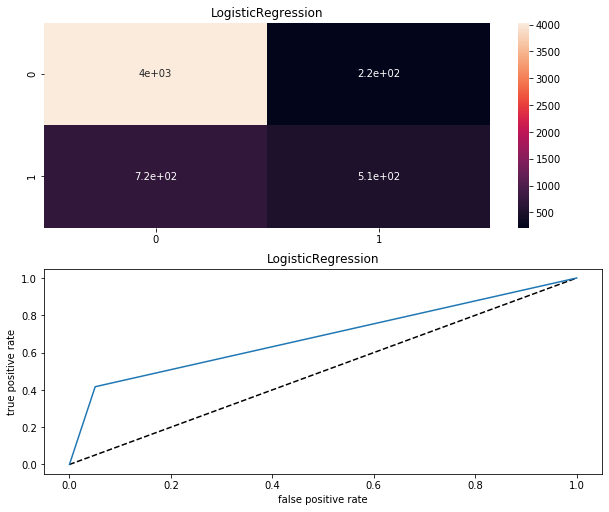




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.8019693654266958


CROSS_VAL_SCORE =  0.7930564614223169


ROC_AUC_SCORE =  0.7739225404717004


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.91      0.82      0.87      4256
           1       0.54      0.72      0.62      1228

    accuracy                           0.80      5484
   macro avg       0.73      0.77      0.74      5484
weighted avg       0.83      0.80      0.81      5484



CONFUSION MATRIX [[3510  746]
 [ 340  888]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


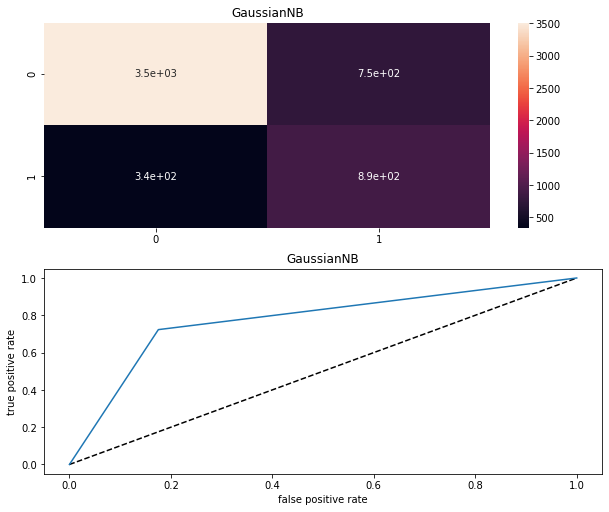




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.8495623632385121


CROSS_VAL_SCORE =  0.8186232723446617


ROC_AUC_SCORE =  0.718548712987681


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.86      0.96      0.91      4256
           1       0.76      0.48      0.59      1228

    accuracy                           0.85      5484
   macro avg       0.81      0.72      0.75      5484
weighted avg       0.84      0.85      0.84      5484



CONFUSION MATRIX [[4068  188]
 [ 637  591]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


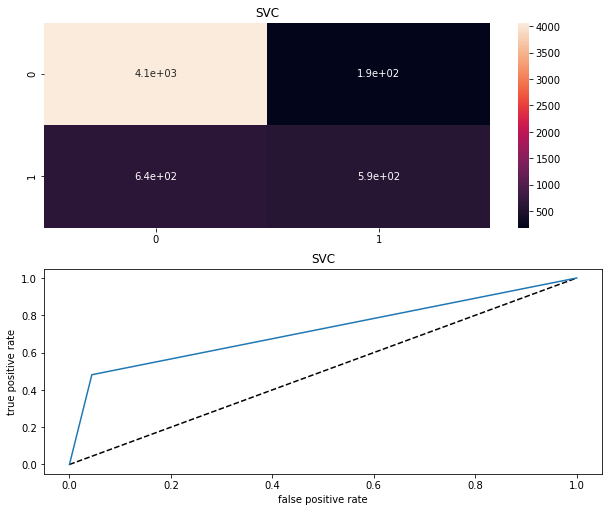




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.8088986141502553


CROSS_VAL_SCORE =  0.782588730813476


ROC_AUC_SCORE =  0.7221879515564155


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.88      0.88      4256
           1       0.57      0.57      0.57      1228

    accuracy                           0.81      5484
   macro avg       0.72      0.72      0.72      5484
weighted avg       0.81      0.81      0.81      5484



CONFUSION MATRIX [[3742  514]
 [ 534  

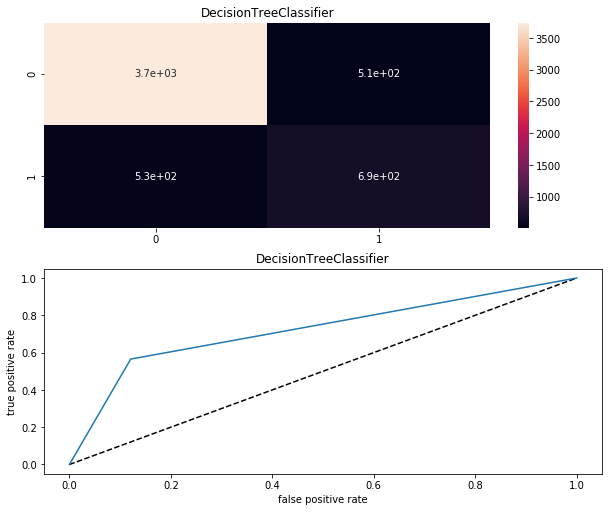




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.8437272064186725


CROSS_VAL_SCORE =  0.8216132713095121


ROC_AUC_SCORE =  0.7524483541916681


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.89      0.92      0.90      4256
           1       0.67      0.59      0.63      1228

    accuracy                           0.84      5484
   macro avg       0.78      0.75      0.76      5484
weighted avg       0.84      0.84      0.84      5484



CONFUSION MATRIX [[3906  350]
 [ 507  721]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


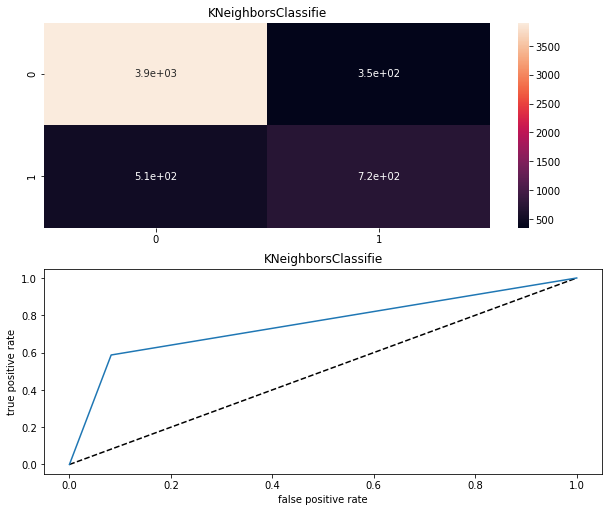

In [46]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results:

In [47]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,83.005106,80.633146,68.309312
1,GaussianNB,80.196937,79.305646,77.392254
2,SVC,84.956236,81.862327,71.854871
3,DecisionTreeClassifier,80.889861,78.258873,72.218795
4,KNeighborsClassifie,84.372721,82.161327,75.244835


In the above result till now we have the SVC model which is performing the best for the given dataset.

# Errors:

In [48]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.36327809487416834
Mean Squared error :  0.2207092270148816
RMSE is :  0.4697970061791386


When your accuracy score is not up to the mark and in oreder to increase the accuracy scor we are going to use here RANDOM FOREST REGRESSOR and GRADIENT BOOSTING REGRESSOR in order to increase the score for the above tests.

The boosting and bagging techniques will re enable or boost the internal parameters inorder to increse the accuracy score of the model.

# Random Forest Regressor With GridSearchCV

In [49]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [50]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=48,stratify=y)
rfr=RandomForestRegressor(bootstrap=True,max_features='sqrt',min_samples_split=8,n_estimators=30)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.6852532723489235

# K-MEANS CLUSTERING

We are going to try here K-Means Clustering model as I can see the unsupervised machine learning. Here kmeans will try to attempt to classify data without being trained first with labeled data.

In [51]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(df1)

In [52]:
kModel.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
pd.crosstab(df1.income,kModel.labels_)

col_0,0,1,2
income,,,
0,20713,6,561
1,4819,485,834


In [54]:
from sklearn.metrics import homogeneity_score

In [55]:
print(homogeneity_score(kModel.labels_,df1.income))

0.1559543860961338


# Random Forest Classifier:

In [69]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators = 100)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8482859226841721
The f1 score of model 2 :  0.6312056737588653


In [65]:
pred_2

array([1, 0, 0, ..., 1, 1, 1])

# Choosing A Model

I am going to choose Support Vector Model as my final model for the given data.It is giving accuracy score of almost 85%which is better than any other model. In comparison to this we have Random Forest Classifier which is performing good but when it comes to the performance then in the machine learning SVC performs better than Random Forest Classifier.
Hence SVC would be my final model.

# Saving the model

In [70]:
from sklearn.externals import joblib

In [71]:
joblib.dump(SVC,'Project_6_Census_adult_analysis.obj')

['Project_6_Census_adult_analysis.obj']

In [72]:
model=joblib.load('Project_6_Census_adult_analysis.obj')

In [73]:
#Pridicting x_test
SVC.predict(x_test)

array([1, 0, 0, ..., 1, 0, 1])

# Gradient Boosting Regressor